# "Social Network" Analysis

Define:

 - Nodes. This could be characters, parts of speech, syntactic elements, artifacts, whatever you like. 
 - Edges. These are relations between the nodes. They can either be directed or undirected. 

In [43]:
import networkx as nx
import spacy
from itertools import combinations
%matplotlib inline

In [3]:
nlp = spacy.load('en_core_web_lg')

In [4]:
moonstone = open('../../Texts/moonstone.md').read()

In [5]:
moonstoneParts = moonstone.split('\n## ')

In [20]:
bet, x, clack, bruff, blake = moonstoneParts[2:7]

In [23]:
betParas = bet.split('\n\n')

In [24]:
len(betParas)

1295

In [55]:
combs = list(combinations(names, 2))

In [56]:
names = ['Betteredge', 'Rachel', 'Franklin', 'Rosanna', 'Cuff', 'Diamond', 'Moonstone']

In [57]:
counter = {comb: 0 for comb in combs}
for para in betParas: 
    for comb in combs: 
        if comb[0] in para and comb[1] in para: 
            counter[comb] += 1

In [58]:
counter

{('Betteredge', 'Rachel'): 8,
 ('Betteredge', 'Franklin'): 31,
 ('Betteredge', 'Rosanna'): 28,
 ('Betteredge', 'Cuff'): 11,
 ('Betteredge', 'Diamond'): 24,
 ('Betteredge', 'Moonstone'): 11,
 ('Rachel', 'Franklin'): 66,
 ('Rachel', 'Rosanna'): 11,
 ('Rachel', 'Cuff'): 19,
 ('Rachel', 'Diamond'): 35,
 ('Rachel', 'Moonstone'): 16,
 ('Franklin', 'Rosanna'): 33,
 ('Franklin', 'Cuff'): 19,
 ('Franklin', 'Diamond'): 47,
 ('Franklin', 'Moonstone'): 24,
 ('Rosanna', 'Cuff'): 37,
 ('Rosanna', 'Diamond'): 14,
 ('Rosanna', 'Moonstone'): 12,
 ('Cuff', 'Diamond'): 6,
 ('Cuff', 'Moonstone'): 9,
 ('Diamond', 'Moonstone'): 20}

In [59]:
namesTuples = [(pair[0], pair[1], n) 
               for pair, n in counter.items()]

In [60]:
socialGraph = nx.Graph()

In [61]:
socialGraph.add_nodes_from(names)

In [62]:
socialGraph.add_weighted_edges_from(namesTuples)

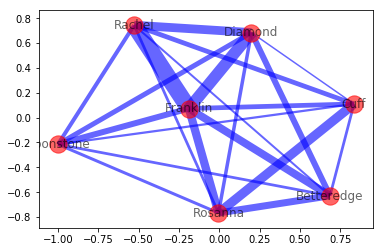

In [77]:
weightsOnly = [t[2]/4 for t in namesTuples]
nx.draw_networkx(socialGraph, 
                 width=weightsOnly,
                 alpha=0.6, edge_color='blue')